In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from datetime import datetime

a) Cargue la base de datos, ¿hay alguna columna que no sea útil para el
análisis?. Revise si existen casos faltantes en la base de datos, según la
descripción de las variables, ¿qué pudiera significar un NA? Tome
decisiones de qué hacer si existen casos faltantes. Si desea imputar los
valores nulos de alguna variable por un valor puede utilizar
data["columna"].fillna('valor', inplace = True).

b) La variable a modelar corresponde al precio de venta de la casa en
dólares. En base a los modelos que hemos aprendido en clases, ¿qué
modelo(s) podría(n) ser de utilidad para predecir el precio de venta de
casas mediante las variables predictoras?

c) Vamos a implementar un modelo de regresión lineal para modelar el
precio de venta de casas. Considerando que en la base de datos

tenemos varias variables que dependen de otras, ¿cuál pudiera ser el
problema que surgiría en este contexto? ¿por qué esto es un problema?
Discuta.

d) Realice un análisis de la correlación entre las variables. Comente,
¿existen variables muy correlacionadas entre sí? ¿Por qué cree que
ocurre?

e) Suponga que este es un problema de gran volumen, donde tenemos
muchas columnas y registros. Cuando existen variables muy
correlacionadas el costo computacional para obtener el modelo puede
ser muy elevado. Obtenga el tiempo de procesamiento para obtener
una regresión lineal. Para esto, podemos obtener la regresión lineal
utilizando la función LinearRegression de sklearn.linear_model y
calcular el tiempo de procesamiento de la siguiente forma:
from datetime import datetime
start=datetime.now()
[aquí va el código del modelo]
print(datetime.now()-start) #esto entrega el tiempo que demoró
en correr el modelo.

f) Obtenga las componentes principales utilizando las variables
estandarizadas, si desea explicar un 80% de la variabilidad, ¿cuántas
componentes debería elegir? Argumente.

g) Corra el modelo de regresión lineal con las componentes principales
como variables predictoras. Vuelva a calcular el tiempo de
procesamiento. ¿En cuál caso suele demorarse menos? ¿Qué ganamos
al realizar componentes principales? Concluya.

In [ ]:
data = pd.read_csv("/content/CD - M6 AE4 - House_price.csv", sep = ";")
data

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,0.0,0,0,953,953,953,694,...,1647,460,0,40,0,0,0,0,0,175000
1456,1457,85.0,13175,119.0,790,163,589,1542,2073,0,...,2073,500,349,0,0,0,0,0,0,210000
1457,1458,66.0,9042,0.0,275,0,877,1152,1188,1152,...,2340,252,0,60,0,0,0,0,2500,266500
1458,1459,68.0,9717,0.0,49,1029,0,1078,1078,0,...,1078,240,366,0,112,0,0,0,0,142125


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   MasVnrArea     1452 non-null   float64
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinSF2     1460 non-null   int64  
 6   BsmtUnfSF      1460 non-null   int64  
 7   TotalBsmtSF    1460 non-null   int64  
 8   1stFlrSF       1460 non-null   int64  
 9   2ndFlrSF       1460 non-null   int64  
 10  LowQualFinSF   1460 non-null   int64  
 11  GrLivArea      1460 non-null   int64  
 12  GarageArea     1460 non-null   int64  
 13  WoodDeckSF     1460 non-null   int64  
 14  OpenPorchSF    1460 non-null   int64  
 15  EnclosedPorch  1460 non-null   int64  
 16  3SsnPorch      1460 non-null   int64  
 17  ScreenPorch    1460 non-null   int64  
 18  PoolArea

In [ ]:
data.describe()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,1460.000000,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [ ]:
data.isna().sum()

Id                 0
LotFrontage      259
LotArea            0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
SalePrice          0
dtype: int64

In [ ]:
data["LotFrontage"].fillna(data["LotFrontage"].median(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)

In [ ]:
data.describe()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,69.863699,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,22.027677,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,1460.000000,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


## B

Dado que las variables son numericas podemos utilizar son:

1. aprendizaje supervizado:
  - regresion lineal
  - K-NN de regresion
  - random forest de regresion

2. aprendizaje no supervisado
  - PCA

## C

Para implementar un modelo de regresion lineal primero que todo tenemos que eliminar la variable Id, o cambiarla al indice dado que no te apotar ninguna informacion

In [ ]:
 data=data.drop(['Id'],axis=1)

In [ ]:
 data

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,1647,460,0,40,0,0,0,0,0,175000
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,2073,500,349,0,0,0,0,0,0,210000
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,2340,252,0,60,0,0,0,0,2500,266500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,1078,240,366,0,112,0,0,0,0,142125


Los problemas que se podrian ver en el de regresion linea son la multicolinealidad, que ocurre cuado las variables tienen alta correlacion, este problema que puede arreglar normalizando sus variables, y o quitando las variables altamente correlacionadas

In [ ]:
#normalizamos las variables
data = data/data.max()
data

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,0.207668,0.039258,0.122500,0.125089,0.000000,0.064212,0.140098,0.182438,0.413559,0.0,0.303084,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.276159
1,0.255591,0.044600,0.000000,0.173281,0.000000,0.121575,0.206547,0.268968,0.000000,0.0,0.223680,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.240397
2,0.217252,0.052266,0.101250,0.086109,0.000000,0.185788,0.150573,0.196078,0.419370,0.0,0.316554,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.296026
3,0.191693,0.044368,0.000000,0.038271,0.000000,0.231164,0.123732,0.204817,0.366102,0.0,0.304325,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.185430
4,0.268371,0.066250,0.218750,0.116052,0.000000,0.209760,0.187398,0.244032,0.509927,0.0,0.389578,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,0.331126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.198083,0.036781,0.000000,0.000000,0.000000,0.407962,0.155974,0.203112,0.336077,0.0,0.291918,0.324401,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.231788
1456,0.271565,0.061209,0.074375,0.139972,0.110583,0.252140,0.252373,0.441816,0.000000,0.0,0.367423,0.352609,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.278146
1457,0.210863,0.042008,0.000000,0.048724,0.000000,0.375428,0.188543,0.253197,0.557869,0.0,0.414747,0.177715,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.352980
1458,0.217252,0.045144,0.000000,0.008682,0.698100,0.000000,0.176432,0.229753,0.000000,0.0,0.191067,0.169252,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.188245


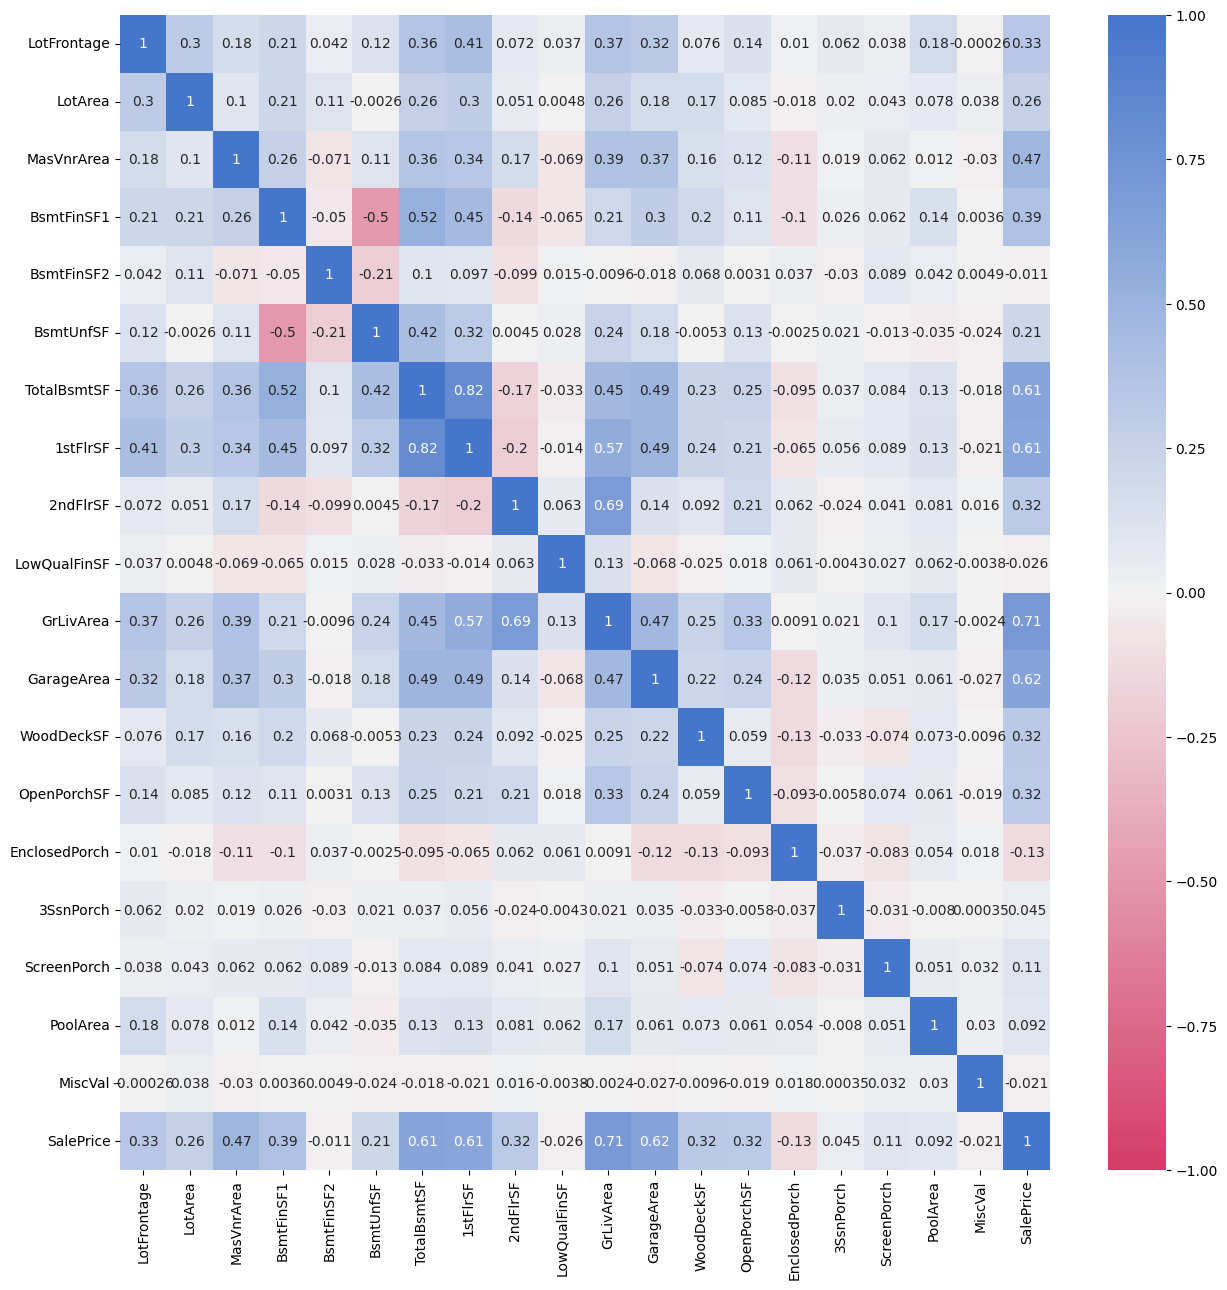

In [ ]:
#correlaciones de los datos
corr_matrix = data.corr(method='pearson')

#graficamos la matriz de correlacion
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,annot=True,linewidths=0,vmin=-1,vmax=1,cmap= sns.diverging_palette(0, 255, n=200));
#sns.diverging_palette() es solo para la paleta de colores, sin embargo si hay un n muy alto 999999 el codigo se dispara en tiempo de ejecucion(4 segundos)

las variables TotalBsmtSF, 1stFlrSF estan altamente correlacionadas dado que estea ultima representa el primer piso de una casa y TotalBsmtSF representa el sotano de una casa por lo que, el sotano no puede ser mayor que la medida en pies del primer piso de la casa y si uno aumenta el otro aumentara en la misma proporcion aproximadamente.

otra de las variables con alta correlacion seria 2ndFlrSF, GrLivArea dado que estas variables corresponde al area habitable por lo que si amuenta una la otra igual va a aumentar

otras variables son GrLivArea con SalePrice que nos da una correlacino entre el area habitable y su precio

por otro lado tenemos una correlacion negativa entre BsmtFinSF1 y BsmtUnfSF dado que esta caorresponden a sotanos con y sin terminar por lo que si una aumenta la otra disminuye 

In [ ]:
# separar las variables predictoras y la variable objetivo
X = data.drop(['SalePrice'], axis = 1)
y=data['SalePrice']

# crear el modelo
model = LinearRegression()

# obtener el tiempo de procesamiento
start = datetime.now()
model.fit(X, y)

print("\nEl tiempo de procesamiento es:")
print(datetime.now() - start)


El tiempo de procesamiento es:
0:00:00.009243


In [ ]:
data_sale= data
data = data.drop(['SalePrice'], axis = 1)
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [ ]:
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = data.columns,
    index   = [f"PC{num+1}" for num in range(data.shape[1])]
)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
PC1,2.798266e-01,2.122856e-01,2.700541e-01,0.257574,0.020164,0.139394,0.415599,0.420186,0.086555,-0.000898,0.380944,3.480413e-01,1.851622e-01,1.959934e-01,-6.696208e-02,2.862632e-02,6.565847e-02,1.099598e-01,-9.768301e-03
PC2,2.721449e-03,-8.667450e-02,6.464279e-02,-0.422731,-0.195238,0.309841,-0.199209,-0.184224,0.605011,0.173997,0.383165,3.446121e-02,-5.471076e-02,1.943263e-01,1.243748e-01,-3.447334e-02,-6.817062e-04,1.125961e-02,-9.238610e-04
PC3,2.778778e-02,1.696230e-01,4.590265e-03,0.339890,0.179726,-0.658526,-0.243818,-0.202835,0.371917,0.079309,0.167075,-4.536404e-02,1.606137e-01,3.319499e-02,5.398525e-02,-8.700190e-02,9.868673e-02,2.407458e-01,9.326774e-02
PC4,2.766112e-01,2.300541e-01,-3.343428e-01,-0.182556,0.377944,0.131204,0.081332,0.132066,-0.134862,0.365792,0.018974,-1.759629e-01,-1.857688e-01,-7.414781e-02,4.345314e-01,-2.331517e-02,9.881463e-02,3.211730e-01,1.254487e-01
PC5,-1.458878e-01,-9.887647e-02,-5.114602e-03,-0.095492,0.299446,0.023858,0.034864,-0.000793,-0.025673,0.029073,-0.019220,-6.949934e-03,-1.942074e-01,2.904917e-01,-3.664657e-01,-2.287257e-01,7.382164e-01,-9.642803e-02,5.868185e-02
PC6,1.510323e-01,-1.294973e-01,6.050142e-02,0.222491,-0.439569,-0.087788,-0.018745,-0.012385,-0.019086,0.079338,-0.017626,-9.746825e-03,-5.162882e-01,2.759376e-02,1.646035e-02,5.372951e-01,2.523368e-01,1.728689e-01,2.212015e-01
PC7,2.273853e-02,2.553817e-01,-8.096431e-03,-0.151353,0.070618,0.094713,-0.035991,-0.030543,0.057925,-0.353854,-0.007092,1.532646e-02,1.285534e-01,-1.052253e-01,-6.825271e-02,7.955088e-02,-1.392011e-02,-1.372762e-01,8.418003e-01
PC8,7.926150e-02,2.517772e-01,-1.182915e-01,-0.172469,0.339616,-0.039180,-0.093886,-0.051125,0.062717,0.116567,0.025275,-1.119400e-02,1.266891e-01,6.246794e-02,-3.149978e-01,7.062731e-01,-4.980335e-02,-2.482160e-01,-2.406447e-01
PC9,-1.355828e-01,-9.608338e-02,-1.538501e-01,0.037335,-0.232967,0.080649,0.034379,0.008365,-0.115883,0.611737,-0.033508,-8.624411e-02,3.546214e-01,3.907062e-02,-4.575324e-01,-3.650166e-02,-1.252101e-01,2.477993e-01,2.721160e-01
PC10,6.357380e-02,-1.141167e-01,-2.583400e-01,-0.118573,0.043683,0.086568,-0.020019,-0.058196,0.003655,-0.503673,-0.086383,-6.737623e-03,6.945861e-02,3.352789e-01,-1.909369e-01,8.732581e-02,-1.078341e-01,6.660890e-01,-1.054416e-01


In [ ]:
modelo_pca.explained_variance_ratio_

array([2.09576972e-01, 9.45486596e-02, 8.00370861e-02, 6.83076493e-02,
       5.84128835e-02, 5.55748267e-02, 5.29865595e-02, 5.22326418e-02,
       4.99697731e-02, 4.71901859e-02, 4.51644252e-02, 4.48112210e-02,
       3.79754657e-02, 3.33174020e-02, 2.93714553e-02, 2.78829239e-02,
       1.26398698e-02, 2.34691888e-33, 1.65609342e-33])

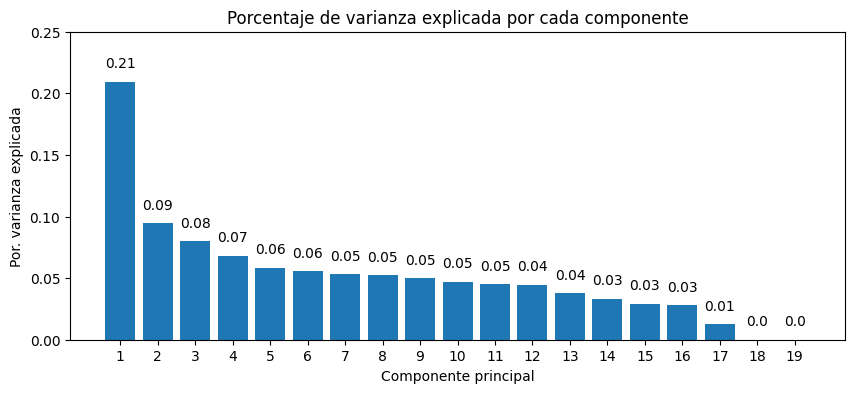

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(data.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 0.25)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

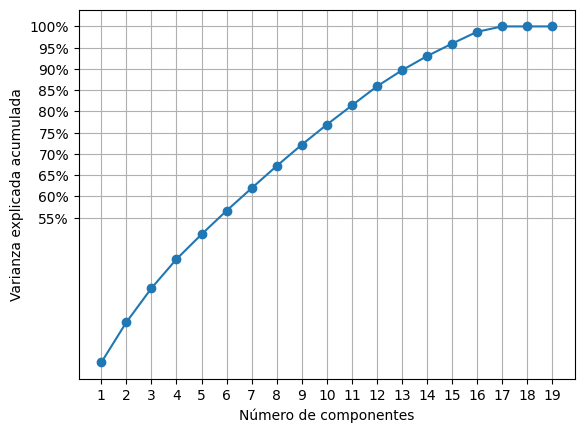

In [ ]:
plt.plot(
    range(1, len(modelo_pca.components_) + 1),
    np.cumsum(modelo_pca.explained_variance_ratio_),
    marker = "o"
)
plt.xticks(
    ticks = np.arange(data.shape[1]) + 1,
)
plt.yticks(
    ticks  = np.linspace(0.55, 1, 10),
    labels = [f"{val:0.0%}" for val in np.linspace(0.55, 1, 10)]
)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.grid()

de lo obtenido anteriormente, si queremos explicar un $80\%$ de variabilidad tendremos que tomar 11 componentes 

In [ ]:
datos_proyectados = pca_pipe.transform(data)

proyecciones = pd.DataFrame(
    datos_proyectados,
    columns = [f"PC{num + 1}" for num in range(data.shape[1])],
    index   = data.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-0.217133,0.686727,1.293994,-1.105774,-0.002845,0.565611,-0.270491,-0.141910,-0.386679,-0.128583,0.353617,0.099721,-0.697426,0.235671,-0.429199,0.172704,-0.287129,-1.029345e-16,8.670078e-17
1,0.349415,-1.761771,0.391444,-0.436529,-0.786298,-0.533274,-0.054714,-0.081876,0.862457,-0.016612,-0.331425,0.189528,0.490578,-1.030764,0.215796,-0.425677,-0.217139,-9.155319e-17,-2.569068e-16
2,0.024291,1.020219,0.700086,-0.763518,-0.071901,0.356150,-0.035534,-0.018016,-0.406374,-0.113484,0.049588,0.331926,-0.686891,0.125799,-0.651160,0.380667,-0.301461,-1.081934e-16,4.159227e-16
3,-0.920914,1.691476,0.481240,1.465589,-1.602576,0.197906,-0.261432,-1.291060,-2.238619,-0.669294,0.594240,-1.007355,1.202909,-0.535749,-0.081238,1.314329,0.011975,-4.361001e-17,-5.152124e-16
4,2.258839,1.372380,1.084728,-1.335759,-0.374881,-0.261755,0.135139,0.114114,-0.247149,-0.201996,-0.056666,0.081500,-0.569875,-0.213220,0.208216,0.613899,-0.247785,-4.417702e-17,5.971241e-17


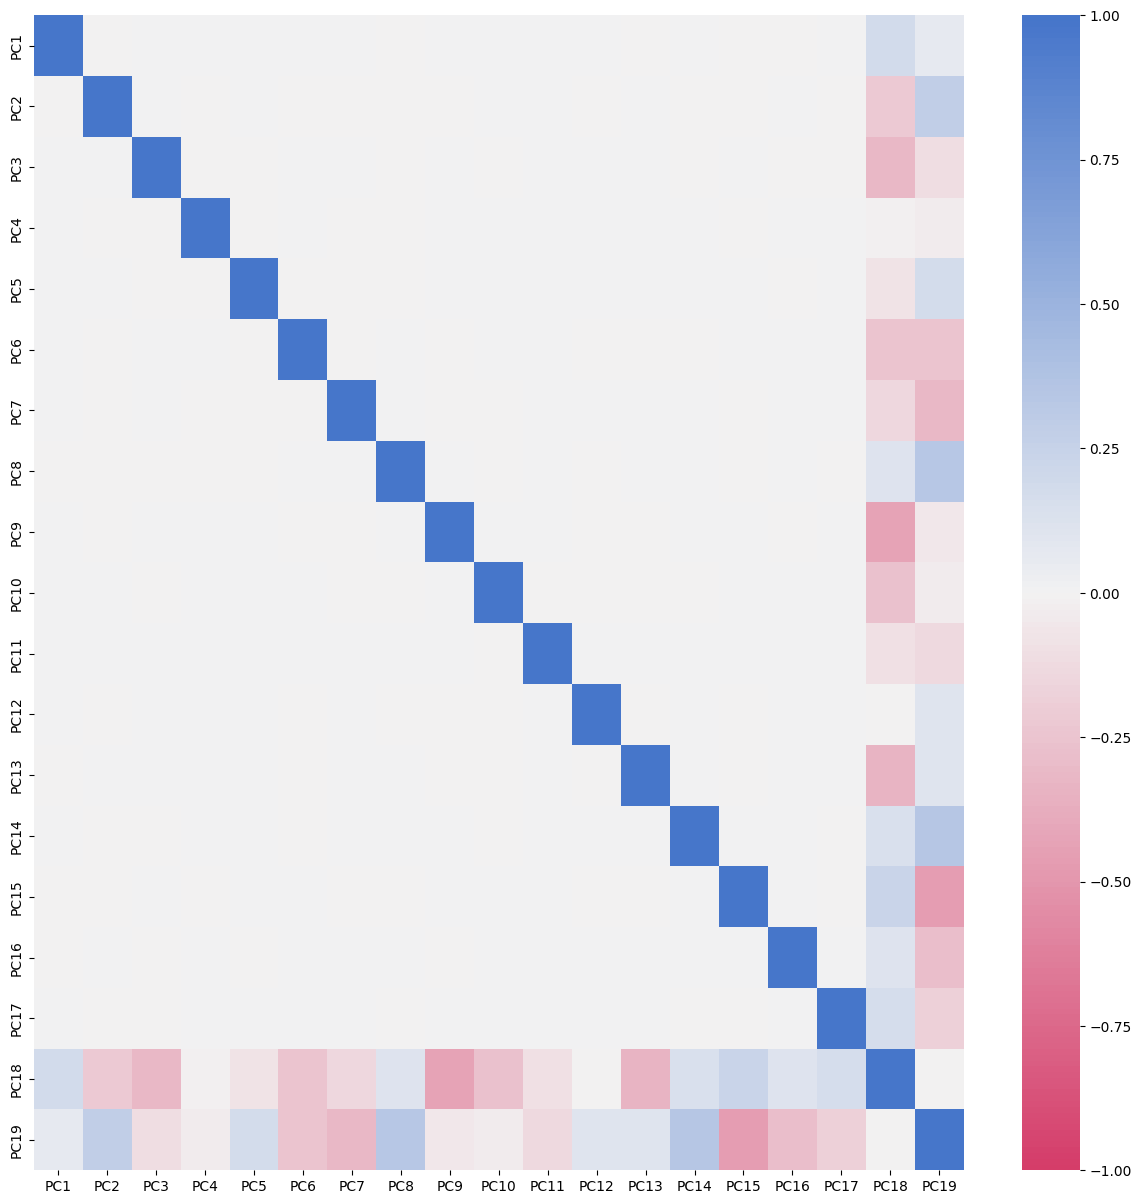

In [ ]:
#correlaciones de los datos
corr_matrix1 = proyecciones.corr(method='pearson')

#graficamos la matriz de correlacion
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix1,annot=False,linewidths=0,vmin=-1,vmax=1,cmap= sns.diverging_palette(0, 255, n=200));
#sns.diverging_palette() es solo para la paleta de colores, sin embargo si hay un n muy alto 999999 el codigo se dispara en tiempo de ejecucion(4 segundos)

In [ ]:
df_para_modelo = proyecciones.iloc[:,0:11]
df_para_modelo

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.217133,0.686727,1.293994,-1.105774,-0.002845,0.565611,-0.270491,-0.141910,-0.386679,-0.128583,0.353617
1,0.349415,-1.761771,0.391444,-0.436529,-0.786298,-0.533274,-0.054714,-0.081876,0.862457,-0.016612,-0.331425
2,0.024291,1.020219,0.700086,-0.763518,-0.071901,0.356150,-0.035534,-0.018016,-0.406374,-0.113484,0.049588
3,-0.920914,1.691476,0.481240,1.465589,-1.602576,0.197906,-0.261432,-1.291060,-2.238619,-0.669294,0.594240
4,2.258839,1.372380,1.084728,-1.335759,-0.374881,-0.261755,0.135139,0.114114,-0.247149,-0.201996,-0.056666
...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.790474,1.404811,-0.700363,-0.077573,0.149086,-0.020667,0.119131,0.083183,-0.028035,0.376545,-0.021722
1456,2.553076,-1.496774,-0.218141,0.286192,-0.589130,-1.379329,0.192972,0.257012,0.616704,-0.301667,-0.699927
1457,0.124394,2.045796,0.543211,0.647847,0.403058,1.214995,4.257663,-1.129123,1.267413,-0.289494,1.023319
1458,-1.174740,-2.148024,1.629124,2.887837,0.604457,-4.038869,0.594985,1.979255,-1.243378,0.173068,-0.417402


In [ ]:
# separar las variables predictoras y la variable objetivo
X = df_para_modelo
y = data_sale['SalePrice']

# crear el modelo
model = LinearRegression()

# obtener el tiempo de procesamiento
start = datetime.now()
model.fit(X, y)

print("\nEl tiempo de procesamiento es:")
print(datetime.now() - start)


El tiempo de procesamiento es:
0:00:00.006364


## G

Se demora menos el que contiene 11 variables, con una ganada de tiempo de 0.003 segundos.

Sin embargo considero que no es una ganada real, dado que piedes 20% de verosimilitud(MLE), uno podria asignar la verosimilitud en el PCA o el numero de estimadores para que este tenga los mismos resultados con menos carga para el procesador.  